In [37]:
import qiskit
from qiskit import QuantumCircuit, QuantumRegister
import math
pi = math.pi

In [38]:
from qiskit.circuit import ParameterVector
test_theta = ParameterVector('test_theta', 4)
test_phi = ParameterVector('test_phi', 8)

In [39]:
def filter_four(phi,theta):
    qc = QuantumCircuit(4)
    for i in range (4):
        qc.ry(theta[i],i)
    qc.cry(phi[1],0,1)
    qc.cry(phi[2],1,2)
    qc.cry(phi[3],2,3)
    qc.cry(phi[0],3,0)
    return qc

test_4 = filter_four(test_phi,test_theta)
test_4.draw()

┌───────────────────┐                                      »
q_0: ┤ Ry(test_theta[0]) ├─────────■────────────────────────────»
     ├───────────────────┤┌────────┴────────┐                   »
q_1: ┤ Ry(test_theta[1]) ├┤ Ry(test_phi[1]) ├─────────■─────────»
     ├───────────────────┤└─────────────────┘┌────────┴────────┐»
q_2: ┤ Ry(test_theta[2]) ├───────────────────┤ Ry(test_phi[2]) ├»
     ├───────────────────┤                   └─────────────────┘»
q_3: ┤ Ry(test_theta[3]) ├──────────────────────────────────────»
     └───────────────────┘                                      »
«                        ┌─────────────────┐
«q_0: ───────────────────┤ Ry(test_phi[0]) ├
«                        └────────┬────────┘
«q_1: ────────────────────────────┼─────────
«                                 │         
«q_2: ─────────■──────────────────┼─────────
«     ┌────────┴────────┐         │         
«q_3: ┤ Ry(test_phi[3]) ├─────────■─────────
«     └─────────────────┘

In [40]:
# the whole structure consisting 3-qubit filter (Figure 2.(b)) is built with this function
def filter_three_layer(phi,theta):
    qc = QuantumCircuit(8)
    for i in range (8):
        qc.ry(theta[i%3],i)
    qc.cry(phi[1],0,1)
    qc.cry(phi[2],1,2)
    qc.cry(phi[3],2,3)
    qc.cry(phi[0],3,0)

    qc.cry(phi[1],4,5)
    qc.cry(phi[2],5,6)
    qc.cry(phi[3],6,7)
    qc.cry(phi[0],7,0)
    for i in range (8):
        qc.ry(phi[(i+1)%3],i)
    qc.cry(phi[1],2,3)
    qc.cry(phi[2],3,4)
    qc.cry(phi[3],4,5)
    qc.cry(phi[0],5,2)

    qc.cry(phi[1],6,7)
    qc.cry(phi[2],7,0)
    qc.cry(phi[3],0,1)
    qc.cry(phi[0],1,6)
    return qc

#test_3 = filter_three_layer(correct_phi,correct_theta)
#test_3.draw()
test_3 = filter_three_layer(test_phi,test_theta)
test_3.draw()

┌───────────────────┐                                      »
q_0: ┤ Ry(test_theta[0]) ├─────────■────────────────────────────»
     ├───────────────────┤┌────────┴────────┐                   »
q_1: ┤ Ry(test_theta[1]) ├┤ Ry(test_phi[1]) ├─────────■─────────»
     ├───────────────────┤└─────────────────┘┌────────┴────────┐»
q_2: ┤ Ry(test_theta[2]) ├───────────────────┤ Ry(test_phi[2]) ├»
     ├───────────────────┤                   └─────────────────┘»
q_3: ┤ Ry(test_theta[0]) ├──────────────────────────────────────»
     ├───────────────────┤                   ┌─────────────────┐»
q_4: ┤ Ry(test_theta[1]) ├─────────■─────────┤ Ry(test_phi[2]) ├»
     ├───────────────────┤┌────────┴────────┐└─────────────────┘»
q_5: ┤ Ry(test_theta[2]) ├┤ Ry(test_phi[1]) ├─────────■─────────»
     ├───────────────────┤└─────────────────┘┌────────┴────────┐»
q_6: ┤ Ry(test_theta[0]) ├───────────────────┤ Ry(test_phi[2]) ├»
     ├───────────────────┤                   └─────────────────┘»
q_7: ┤ Ry(test_theta[1]) ├──────────────────────────────────────»
     └───────────────────┘                                      »
«                        ┌─────────────────┐                   »
«q_0: ───────────────────┤ Ry(test_phi[0]) ├───────────────────»
«     ┌─────────────────┐└────────┬────────┘                   »
«q_1: ┤ Ry(test_phi[2]) ├─────────┼────────────────────────────»
«     └─────────────────┘         │         ┌─────────────────┐»
«q_2: ─────────■──────────────────┼─────────┤ Ry(test_phi[0]) ├»
«     ┌────────┴────────┐         │         ├─────────────────┤»
«q_3: ┤ Ry(test_phi[3]) ├─────────■─────────┤ Ry(test_phi[1]) ├»
«     └─────────────────┘                   └─────────────────┘»
«q_4: ─────────────────────────────────────────────────────────»
«     ┌─────────────────┐                                      »
«q_5: ┤ Ry(test_phi[0]) ├──────────────────────────────────────»
«     └─────────────────┘┌─────────────────┐                   »
«q_6: ─────────■─────────┤ Ry(test_phi[1]) ├───────────────────»
«     ┌────────┴────────┐└─────────────────┘                   »
«q_7: ┤ Ry(test_phi[3]) ├──────────────────────────────────────»
«     └─────────────────┘                                      »
«     ┌─────────────────┐┌─────────────────┐                   »
«q_0: ┤ Ry(test_phi[0]) ├┤ Ry(test_phi[1]) ├───────────────────»
«     └────────┬────────┘└─────────────────┘                   »
«q_1: ─────────┼───────────────────────────────────────────────»
«              │                                               »
«q_2: ─────────┼──────────────────■────────────────────────────»
«              │         ┌────────┴────────┐                   »
«q_3: ─────────┼─────────┤ Ry(test_phi[1]) ├─────────■─────────»
«              │         └─────────────────┘┌────────┴────────┐»
«q_4: ─────────┼────────────────────────────┤ Ry(test_phi[2]) ├»
«              │                            └─────────────────┘»
«q_5: ─────────┼───────────────────────────────────────────────»
«              │                                               »
«q_6: ─────────┼─────────────────────────────────────■─────────»
«              │         ┌─────────────────┐┌────────┴────────┐»
«q_7: ─────────■─────────┤ Ry(test_phi[2]) ├┤ Ry(test_phi[1]) ├»
«                        └─────────────────┘└─────────────────┘»
«                        ┌─────────────────┐                   »
«q_0: ───────────────────┤ Ry(test_phi[2]) ├─────────■─────────»
«                        └────────┬────────┘┌────────┴────────┐»
«q_1: ────────────────────────────┼─────────┤ Ry(test_phi[3]) ├»
«                                 │         ├─────────────────┤»
«q_2: ────────────────────────────┼─────────┤ Ry(test_phi[0]) ├»
«                                 │         └────────┬────────┘»
«q_3: ────────────────────────────┼──────────────────┼─────────»
«                                 │                  │         »
«q_4: ─────────■──────────────────┼──────────────────┼─────────»
«     ┌────────┴───────

In [41]:
def filter_two(theta):
    qc = QuantumCircuit(2)
    qc.ry(theta[0],0)
    qc.ry(theta[1],1)
    qc.cx(0,1)
    qc.ry(theta[2],0)
    qc.ry(theta[3],1)
    qc.cx(1,0)
    return qc
test_2 = filter_two(test_theta)
test_2.draw()

┌───────────────────┐     ┌───────────────────┐┌───┐
q_0: ┤ Ry(test_theta[0]) ├──■──┤ Ry(test_theta[2]) ├┤ X ├
     ├───────────────────┤┌─┴─┐├───────────────────┤└─┬─┘
q_1: ┤ Ry(test_theta[1]) ├┤ X ├┤ Ry(test_theta[3]) ├──■──
     └───────────────────┘└───┘└───────────────────┘

In [42]:
def pooling(theta):
    qc = QuantumCircuit(2)
    qc.crz(theta[0],0,1)
    qc.x(0)
    qc.crx(theta[1],0,1)
    qc.x(0)
    return qc

In [43]:
def regular_layer_y(phi,theta):
    qc = QuantumCircuit(4)
    for i in range (4):
        qc.ry(theta[i],i)
    qc.cry(phi[1],0,1)
    qc.cry(phi[2],1,2)
    qc.cry(phi[4],2,3)
    qc.cry(phi[0],3,0)

    qc.cry(phi[4],1,2)
    qc.cry(phi[5],2,3)
    qc.cry(phi[6],3,0)
    qc.cry(phi[7],0,1)
    return qc

def regular_layer_x(phi,theta):
    qc = QuantumCircuit(4)
    for i in range (4):
        qc.rx(theta[i],i)
    qc.crx(phi[1],0,1)
    qc.crx(phi[2],1,2)
    qc.crx(phi[4],2,3)
    qc.crx(phi[0],3,0)

    qc.crx(phi[4],1,2)
    qc.crx(phi[5],2,3)
    qc.crx(phi[6],3,0)
    qc.crx(phi[7],0,1)
    return qc

def regular_layer_z(phi,theta):
    qc = QuantumCircuit(4)
    for i in range (4):
        qc.rz(theta[i],i)
    qc.crz(phi[1],0,1)
    qc.crz(phi[2],1,2)
    qc.crz(phi[4],2,3)
    qc.crz(phi[0],3,0)

    qc.crz(phi[4],1,2)
    qc.crz(phi[5],2,3)
    qc.crz(phi[6],3,0)
    qc.crz(phi[7],0,1)
    return qc

In [44]:
pre_scan = QuantumCircuit(14,4)
ff = filter_four(test_phi,test_theta)
ft = filter_two(test_theta)
fth = filter_three_layer(test_phi,test_theta)
pre_scan = pre_scan.compose(ff,[1,2,3,4])
pre_scan = pre_scan.compose(ff,[5,6,7,8])
pre_scan = pre_scan.compose(ft,[1,2])
pre_scan = pre_scan.compose(ff,[3,4,5,6])
pre_scan = pre_scan.compose(ft,[7,8])
pre_scan = pre_scan.compose(fth,[1,2,3,4,5,6,7,8])
pre_scan = pre_scan.compose(ft,[1,2])
pre_scan = pre_scan.compose(ft,[3,4])
pre_scan = pre_scan.compose(ft,[5,6])
pre_scan = pre_scan.compose(ft,[7,8])
pre_scan = pre_scan.compose(ft,[0,1])
pre_scan = pre_scan.compose(ft,[2,3])
pre_scan = pre_scan.compose(ft,[4,5])
pre_scan = pre_scan.compose(ft,[6,7])
pre_scan = pre_scan.compose(ft,[8,9])

pre_scan.draw(scale = 0.5,fold=-1)

┌───────────────────┐                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  ┌───────────────────┐┌───┐
 q_0: ┤ Ry(test_theta[0]) ├───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────■──────────┤ Ry(test_theta[2]) ├┤ X ├
      ├───────────────────┤                                                           ┌─────────────────┐┌───────────────────┐                   ┌───────────────────┐        ┌───┐        ┌───────────────────┐                                                           ┌─────────────────┐                   ┌─────────────────┐┌─────────────────┐                                        ┌─────────────────┐                     ┌───────────────────┐                                                             ┌───────────────────┐        ┌───┐        ┌───────────────────┐        ┌─┴─┐        ├───────────────────┤└─┬─┘
 q_1: ┤ Ry(test_theta[0]) ├─────────■─────────────────────────────────────────────────┤ Ry(test_phi[0]) ├┤ Ry(test_theta[0]) ├─────────■─────────┤ Ry(test_theta[2]) ├────────┤ X ├────────┤ Ry(test_theta[0]) ├──────────■────────────────────────────────────────────────┤ Ry(test_phi[0]) ├───────────────────┤ Ry(test_phi[0]) ├┤ Ry(test_phi[1]) ├────────────────────────────────────────┤ Ry(test_phi[2]) ├──────────■──────────┤ Ry(test_theta[0]) ├──────────────────────────────────────────────────■──────────┤ Ry(test_theta[2]) ├────────┤ X ├────────┤ Ry(test_theta[1]) ├────────┤ X ├────────┤ Ry(test_theta[3]) ├──■──
      ├───────────────────┤┌────────┴────────┐                   ┌───────────────────┐└────────┬────────┘└───────────────────┘       ┌─┴─┐       ├───────────────────┤        └─┬─┘        ├───────────────────┤ ┌────────┴────────┐                    ┌─────────────────┐└────────┬────────┘                   └────────┬────────┘└─────────────────┘                                        └────────┬────────┘ ┌────────┴────────┐ └───────────────────┘                   ┌───────────────────┐        ┌─┴─┐        ├───────────────────┤        └─┬─┘        ├───────────────────┤        └───┘        ├───────────────────┤┌───┐
 q_2: ┤ Ry(test_theta[1]) ├┤ Ry(test_phi[1]) ├─────────■─────────┤ Ry(test_theta[1]) ├─────────┼─────────────────────────────────────┤ X ├───────┤ Ry(test_theta[3]) ├──────────■──────────┤ Ry(test_theta[1]) ├─┤ Ry(test_phi[1]) ├──────────■─────────┤ Ry(test_phi[2]) ├─────────┼─────────────────────────────────────┼─────────────────────────────────────────────────────────────────────────────┼──────────┤ Ry(test_phi[3]) ├───────────────────────────────■─────────┤ Ry(test_theta[1]) ├────────┤ X ├────────┤ Ry(test_theta[3]) ├──────────■──────────┤ Ry(test_theta[0]) ├──────────■──────────┤ Ry(test_theta[2]) ├┤ X ├
      ├───────────────────┤└─────────────────┘┌────────┴────────┐└───────────────────┘         │         ┌───────────────────┐       └───┘       └───────────────────┘                     └┬─────────────────┬┘┌┴─────────────────┴┐┌────────┴────────┐└─────────────────┘         │         ┌─────────────────┐     

In [45]:
qcnn_layer = QuantumCircuit(14)
qcnn_layer = qcnn_layer.compose(ft,[1,2])
qcnn_layer = qcnn_layer.compose(ft,[3,4])
qcnn_layer = qcnn_layer.compose(ft,[5,6])
qcnn_layer = qcnn_layer.compose(ft,[7,8])
qcnn_layer = qcnn_layer.compose(ft,[0,1])
qcnn_layer = qcnn_layer.compose(ft,[2,3])
qcnn_layer = qcnn_layer.compose(ft,[4,5])
qcnn_layer = qcnn_layer.compose(ft,[6,7])
qcnn_layer = qcnn_layer.compose(ft,[8,9])
pool = pooling(test_theta)
qcnn_layer = qcnn_layer.compose(pool,[1,2])
qcnn_layer = qcnn_layer.compose(pool,[3,4])
qcnn_layer = qcnn_layer.compose(pool,[5,6])
qcnn_layer = qcnn_layer.compose(pool,[7,8])

qcnn_layer.draw(scale=0.5,fold=-1)

┌───────────────────┐                                                         ┌───────────────────┐┌───┐                                                    
 q_0: ┤ Ry(test_theta[0]) ├──────────────────────────────────────────────────────■──┤ Ry(test_theta[2]) ├┤ X ├────────────────────────────────────────────────────
      ├───────────────────┤     ┌───────────────────┐┌───┐┌───────────────────┐┌─┴─┐├───────────────────┤└─┬─┘                     ┌───┐                     ┌───┐
 q_1: ┤ Ry(test_theta[0]) ├──■──┤ Ry(test_theta[2]) ├┤ X ├┤ Ry(test_theta[1]) ├┤ X ├┤ Ry(test_theta[3]) ├──■────────────■──────────┤ X ├──────────■──────────┤ X ├
      ├───────────────────┤┌─┴─┐├───────────────────┤└─┬─┘├───────────────────┤└───┘├───────────────────┤┌───┐┌─────────┴─────────┐└───┘┌─────────┴─────────┐└───┘
 q_2: ┤ Ry(test_theta[1]) ├┤ X ├┤ Ry(test_theta[3]) ├──■──┤ Ry(test_theta[0]) ├──■──┤ Ry(test_theta[2]) ├┤ X ├┤ Rz(test_theta[0]) ├─────┤ Rx(test_theta[1]) ├─────
      ├───────────────────┤└───┘├───────────────────┤┌───┐├───────────────────┤┌─┴─┐├───────────────────┤└─┬─┘└───────────────────┘┌───┐└───────────────────┘┌───┐
 q_3: ┤ Ry(test_theta[0]) ├──■──┤ Ry(test_theta[2]) ├┤ X ├┤ Ry(test_theta[1]) ├┤ X ├┤ Ry(test_theta[3]) ├──■────────────■──────────┤ X ├──────────■──────────┤ X ├
      ├───────────────────┤┌─┴─┐├───────────────────┤└─┬─┘├───────────────────┤└───┘├───────────────────┤┌───┐┌─────────┴─────────┐└───┘┌─────────┴─────────┐└───┘
 q_4: ┤ Ry(test_theta[1]) ├┤ X ├┤ Ry(test_theta[3]) ├──■──┤ Ry(test_theta[0]) ├──■──┤ Ry(test_theta[2]) ├┤ X ├┤ Rz(test_theta[0]) ├─────┤ Rx(test_theta[1]) ├─────
      ├───────────────────┤└───┘├───────────────────┤┌───┐├───────────────────┤┌─┴─┐├───────────────────┤└─┬─┘└───────────────────┘┌───┐└───────────────────┘┌───┐
 q_5: ┤ Ry(test_theta[0]) ├──■──┤ Ry(test_theta[2]) ├┤ X ├┤ Ry(test_theta[1]) ├┤ X ├┤ Ry(test_theta[3]) ├──■────────────■──────────┤ X ├──────────■──────────┤ X ├
      ├───────────────────┤┌─┴─┐├───────────────────┤└─┬─┘├───────────────────┤└───┘├───────────────────┤┌───┐┌─────────┴─────────┐└───┘┌─────────┴─────────┐└───┘
 q_6: ┤ Ry(test_theta[1]) ├┤ X ├┤ Ry(test_theta[3]) ├──■──┤ Ry(test_theta[0]) ├──■──┤ Ry(test_theta[2]) ├┤ X ├┤ Rz(test_theta[0]) ├─────┤ Rx(test_theta[1]) ├─────
      ├───────────────────┤└───┘├───────────────────┤┌───┐├───────────────────┤┌─┴─┐├───────────────────┤└─┬─┘└───────────────────┘┌───┐└───────────────────┘┌───┐
 q_7: ┤ Ry(test_theta[0]) ├──■──┤ Ry(test_theta[2]) ├┤ X ├┤ Ry(test_theta[1]) ├┤ X ├┤ Ry(test_theta[3]) ├──■────────────■──────────┤ X ├──────────■──────────┤ X ├
      ├───────────────────┤┌─┴─┐├───────────────────┤└─┬─┘├───────────────────┤└───┘├───────────────────┤┌───┐┌─────────┴─────────┐└───┘┌─────────┴─────────┐└───┘
 q_8: ┤ Ry(test_theta[1]) ├┤ X ├┤ Ry(test_theta[3]) ├──■──┤ Ry(test_theta[0]) ├──■──┤ Ry(test_theta[2]) ├┤ X ├┤ Rz(test_theta[0]) ├─────┤ Rx(test_theta[1]) ├─────
      ├───────────────────┤└───┘└───────────────────┘     └───────────────────┘┌─┴─┐├───────────────────┤└─┬─┘└───────────────────┘     └───────────────────┘     
 q_9: ┤ Ry(test_theta[1]) ├────────────────────────────────────────────────────┤ X ├┤ Ry(test_theta[3]) ├──■──────────────────────────────────────────────────────
      └───────────────────┘                                                    └───┘└───────────────────┘                                                         
q_10: ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
                                                                                                                                                                  
q_11: ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
                                                                                              

In [46]:
rly = regular_layer_y(test_phi,test_theta)
rlx = regular_layer_x(test_phi,test_theta)
rlz = regular_layer_z(test_phi,test_theta)
reg_layer = QuantumCircuit(4)
reg_layer = reg_layer.compose(rly)
reg_layer = reg_layer.compose(rly)
reg_layer = reg_layer.compose(rly)
reg_layer = reg_layer.compose(rlx)
reg_layer = reg_layer.compose(rlx)
reg_layer = reg_layer.compose(rlx)
reg_layer = reg_layer.compose(rlz)
reg_layer = reg_layer.compose(rlz)
reg_layer = reg_layer.compose(rlz)
reg_layer = reg_layer.compose(pool,[0,1])
reg_layer = reg_layer.compose(pool,[2,3])
reg_layer = reg_layer.compose(ft,[1,3])

reg_layer.draw(scale=0.5,fold=-1)

┌───────────────────┐                                                         ┌─────────────────┐                                      ┌─────────────────┐                     ┌───────────────────┐                                                         ┌─────────────────┐                                      ┌─────────────────┐                     ┌───────────────────┐                                                         ┌─────────────────┐                                      ┌─────────────────┐                     ┌───────────────────┐                                                         ┌─────────────────┐                                      ┌─────────────────┐                     ┌───────────────────┐                                                         ┌─────────────────┐                                      ┌─────────────────┐                     ┌───────────────────┐                                                         ┌─────────────────┐                                      ┌─────────────────┐                     ┌───────────────────┐                                                         ┌─────────────────┐                                      ┌─────────────────┐                     ┌───────────────────┐                                                         ┌─────────────────┐                                      ┌─────────────────┐                     ┌───────────────────┐                                                         ┌─────────────────┐                                      ┌─────────────────┐                                                  ┌───┐                                     ┌───┐                                       
q_0: ┤ Ry(test_theta[0]) ├─────────■───────────────────────────────────────────────┤ Ry(test_phi[0]) ├──────────────────────────────────────┤ Ry(test_phi[6]) ├──────────■──────────┤ Ry(test_theta[0]) ├─────────■───────────────────────────────────────────────┤ Ry(test_phi[0]) ├──────────────────────────────────────┤ Ry(test_phi[6]) ├──────────■──────────┤ Ry(test_theta[0]) ├─────────■───────────────────────────────────────────────┤ Ry(test_phi[0]) ├──────────────────────────────────────┤ Ry(test_phi[6]) ├──────────■──────────┤ Rx(test_theta[0]) ├─────────■───────────────────────────────────────────────┤ Rx(test_phi[0]) ├──────────────────────────────────────┤ Rx(test_phi[6]) ├──────────■──────────┤ Rx(test_theta[0]) ├─────────■───────────────────────────────────────────────┤ Rx(test_phi[0]) ├──────────────────────────────────────┤ Rx(test_phi[6]) ├──────────■──────────┤ Rx(test_theta[0]) ├─────────■───────────────────────────────────────────────┤ Rx(test_phi[0]) ├──────────────────────────────────────┤ Rx(test_phi[6]) ├──────────■──────────┤ Rz(test_theta[0]) ├─────────■───────────────────────────────────────────────┤ Rz(test_phi[0]) ├──────────────────────────────────────┤ Rz(test_phi[6]) ├──────────■──────────┤ Rz(test_theta[0]) ├─────────■───────────────────────────────────────────────┤ Rz(test_phi[0]) ├──────────────────────────────────────┤ Rz(test_phi[6]) ├──────────■──────────┤ Rz(test_theta[0]) ├─────────■───────────────────────────────────────────────┤ Rz(test_phi[0]) ├──────────────────────────────────────┤ Rz(test_phi[6]) ├──────────■────────────────────■──────────────────┤ X ├──────────────────■──────────────────┤ X ├───────────────────────────────────────
     ├───────────────────┤┌────────┴────────┐                                      └────────┬────────┘                                      └────────┬────────┘ ┌────────┴────────┐ ├───────────────────┤┌────────┴────────┐                                      └────────┬────────┘                                      └────────┬────────┘ ┌────────┴────────┐ ├───────────────────┤┌────────┴────────┐                                      └────────┬────────┘                                      └────────┬────────┘ ┌────────┴────────┐ ├───────────────────┤┌────────┴────────┐                                      └────

In [47]:
tof_cr = QuantumCircuit(6)
tof_cr.ccx(0,1,2)
tof_cr.x(0)
tof_cr.ccx(0,1,3)
tof_cr.x([0,1])
tof_cr.ccx(0,1,4)
tof_cr.x(0)
tof_cr.ccx(0,1,5)

tof_cr.draw(scale=0.5,fold = -1)

┌───┐     ┌───┐     ┌───┐     
q_0: ──■──┤ X ├──■──┤ X ├──■──┤ X ├──■──
       │  └───┘  │  ├───┤  │  └───┘  │  
q_1: ──■─────────■──┤ X ├──■─────────■──
     ┌─┴─┐       │  └───┘  │         │  
q_2: ┤ X ├───────┼─────────┼─────────┼──
     └───┘     ┌─┴─┐       │         │  
q_3: ──────────┤ X ├───────┼─────────┼──
               └───┘     ┌─┴─┐       │  
q_4: ────────────────────┤ X ├───────┼──
                         └───┘     ┌─┴─┐
q_5: ──────────────────────────────┤ X ├
                                   └───┘

┌──────────────────────────┐
q_0: ┤0                         ├
     │  ZZFeatureMap(x[0],x[1]) │
q_1: ┤1                         ├
     └──────────────────────────┘

In [48]:
#qc:whole structure
qc = pre_scan + qcnn_layer
qc = qc.compose(reg_layer,[2,4,6,8])
qc = qc.compose(tof_cr,[4,8,10,11,12,13])

qc.measure([10,11,12,13],[0,1,2,3])

qc.draw(scale = 0.5,fold = -1)
#qc.parameters.add(test_phi)
#qc.parameters.add(test_theta)

/var/folders/q3/rbp1fpy10c3ff9w1fyr_djbr0000gn/T/ipykernel_82562/2200778435.py:2: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  qc = pre_scan + qcnn_layer


┌───────────────────┐                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  ┌───────────────────┐        ┌───┐        ┌───────────────────┐                                                         ┌───────────────────┐┌───┐                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
 q_0: ┤ Ry(test_theta[0]) ├───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────■──────────┤ Ry(test_theta[2]) ├────────┤ X ├────────┤ Ry(test_theta[0]) ├──────────────────────────────────────────────────────■──┤ Ry(test_theta[2]) ├┤ X ├────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

In [49]:
#test_theta = [(pi/8*i)for i in range(1,5)]
#test_phi = [(pi/9*(2*i-1))for i in range(1,9)]
qc.bind_parameters({test_phi: [(pi/9*(2*i-1))for i in range(1,9)]})
qc.bind_parameters({test_theta: [(pi/8*i)for i in range(1,5)]})
qc.parameters

ParameterView([ParameterVectorElement(test_phi[0]), ParameterVectorElement(test_phi[1]), ParameterVectorElement(test_phi[2]), ParameterVectorElement(test_phi[3]), ParameterVectorElement(test_phi[4]), ParameterVectorElement(test_phi[5]), ParameterVectorElement(test_phi[6]), ParameterVectorElement(test_phi[7]), ParameterVectorElement(test_theta[0]), ParameterVectorElement(test_theta[1]), ParameterVectorElement(test_theta[2]), ParameterVectorElement(test_theta[3])])

In [51]:
from qiskit import transpile,assemble
class My_QuantumCircuit:
    def __init__(self,circuit,backend,shots):
        self.circuit = circuit
        self.backend = backend
        self.shots = shots
    def run(self):
        t_qc = transpile(self.circuit,self.backend)
        q_obj = assemble(t_qc,shots = self.shots)
        job = self.backend.run(q_obj)
        result = job.result().get_counts()
        collection = [0] * 10
        #It means the probability of '1' for each qubit
        for str_ in list(result.keys()):
            for j in range(len(str_)):
                if int(str_[len(str_) - 1 - j]):
                    collection[j] += 1/self.shots * result[str_]
        
        #print('collection = ', collection)
        
        return collection    




In [52]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [66]:
from torch.autograd import Function
class trainingFunction(Function):
    
    @staticmethod
    def forward(self,input,qc,shift):
        self.shift = shift
        self.qc = qc
        
        print("input",input[0].shape)
        expectation_z = self.qc.run(input[0].tolist())

        result = torch.tensor([expectation_z])
        self.save_for_backward(input,result)
        print("result",result)
        return result
    
    @staticmethod
    def backward(self,grad_output):
        """ Backward pass computation """
        input, expectation_z = self.saved_tensors
        
        
        input_list = np.array(input.tolist())

        shift_right = input_list + np.ones(input_list.shape) * self.shift
        shift_left = input_list - np.ones(input_list.shape) * self.shift
        

        #gradients = []
        
        for i in range(len(input_list)):
            expectation_right = self.quantum_circuit.run(shift_right[i])
            expectation_left  = self.quantum_circuit.run(shift_left[i])
            
            gradient = 0.5 * (torch.tensor([expectation_right]) - torch.tensor([expectation_left]))
    
            gradients = gradient.numpy()
            #gradients.append(gradient)
   
            
        #gradients = np.array([gradients]).T
        print("G",gradients)
        return torch.tensor(gradients).float() * grad_output.float(), None, None
class Hybrid(nn.Module):
    """ Hybrid quantum - classical layer definition """
    
    def __init__(self,qc,shift,backend,shots):
        super(Hybrid, self).__init__()
        self.quantum_circuit = My_QuantumCircuit(qc,backend,shots)
        self.shift = shift
        
    def forward(self, input):
        return trainingFunction.apply(input, self.quantum_circuit, self.shift)

In [58]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.hybrid = Hybrid(qc,pi/2,qiskit.Aer.get_backend('aer_simulator'),1000)
    def forward(self,x):
        x = self.hybrid(x)
        x = F.softmax(x)
        return x


In [102]:
from torchvision import datasets, transforms

# Concentrating on the first 100 samples
n_samples = 100

X_train = datasets.MNIST(root='./data', train=True, download=True,
                         transform=transforms.Compose(
        [transforms.Resize(16),transforms.ToTensor()]
    ),)

# Leaving only labels 0 and 1 
X_train.data = X_train.data[:n_samples]
X_train.targets = X_train.targets[:n_samples]
print(X_train[0])
#for i in range(2, 10):
#    idx = np.append(idx, np.where(X_train.targets == i)[0][:n_samples])
    
#X_train.data = X_train.data[idx]
#X_train.targets = X_train.targets[idx]
train_loader = torch.utils.data.DataLoader(X_train, batch_size=1, shuffle=True)

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), 5)


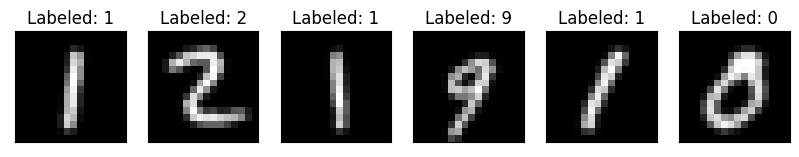

In [84]:
import matplotlib.pyplot as plt
n_samples_show = 6

data_iter = iter(train_loader)

fig, axes = plt.subplots(nrows=1, ncols=n_samples_show, figsize=(10, 3))

while n_samples_show > 0:
    images, targets = data_iter.__next__()

    axes[n_samples_show - 1].imshow(images[0].numpy().squeeze(), cmap='gray')
    axes[n_samples_show - 1].set_xticks([])
    axes[n_samples_show - 1].set_yticks([])
    axes[n_samples_show - 1].set_title("Labeled: {}".format(targets.item()))
    
    n_samples_show -= 1

In [67]:
model = Net()
#optimizer = optim.Adam(qc.parameters,lr=0.001)
loss_func = nn.CrossEntropyLoss()

epochs = 20
loss_list = []

model.train()
for epoch in range(epochs):
    total_loss = []
    for batch_idx, (data, target) in enumerate(train_loader):
        #print(target == 7)
        #print(target.numpy()[0] == 7)
        '''
        if target.numpy()[0] == 7:
            target = torch.LongTensor([0])
            '''
        #optimizer.zero_grad()
        # Forward pass
        #print(data.size())
        output = model(data)
        # Calculating loss
        #print('output = ', output)
        #print('target = ', target)
        loss = loss_func(output, target)
        # Backward pass
        loss.backward()
        # Optimize the weights
        #optimizer.step()
        
        total_loss.append(loss.item())
    loss_list.append(sum(total_loss)/len(total_loss))
    print('Training [{:.0f}%]\tLoss: {:.4f}'.format(
        100. * (epoch + 1) / epochs, loss_list[-1]))

input torch.Size([1, 28, 28])


TypeError: My_QuantumCircuit.run() takes 1 positional argument but 2 were given